<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula06d_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from sklearn.metrics import accuracy_score
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0:2]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

In [3]:
print(len(train_data[0]))
print(len(train_data[1]))

87
56


In [4]:
def decode_words(word_index, sentence):
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_sentence = ' '.join([reverse_word_index.get(i - 3, '?') for i in sentence])
  return decoded_sentence

decode_words(reuters.get_word_index(), train_data[0])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
decode_words(reuters.get_word_index(), train_data[1])

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [6]:
print(len(set(train_labels)))

46


In [7]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print(X_train.shape)
print(X_test.shape)
print(X_train[:3, :32])

(8982, 10000)
(2246, 10000)
[[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 0. 0.]]


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
X_train = tokenizer.sequences_to_matrix(train_data)
X_test = tokenizer.sequences_to_matrix(test_data)
print(X_train.shape)
print(X_test.shape)
print(X_train[:3, :32])

(8982, 10000)
(2246, 10000)
[[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 0. 0.]]


In [9]:
print(train_labels[:10])

[ 3  4  3  4  4  4  4  3  3 16]


In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
n_val = 1000
X_val = X_train[:n_val]
partial_X_train = X_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

In [13]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.3757 - loss: 3.2915 - val_accuracy: 0.6150 - val_loss: 1.9325
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6650 - loss: 1.7375 - val_accuracy: 0.6890 - val_loss: 1.4289
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7361 - loss: 1.2618 - val_accuracy: 0.7270 - val_loss: 1.2338
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7816 - loss: 1.0243 - val_accuracy: 0.7610 - val_loss: 1.1145
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8162 - loss: 0.8502 - val_accuracy: 0.7600 - val_loss: 1.0486
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8381 - loss: 0.7240 - val_accuracy: 0.7740 - val_loss: 1.0009
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8721 - loss: 0.5903 - val_accuracy: 0.7990 - val_loss: 0.9368
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8991 - loss: 0.4984 - val_accuracy: 0.8020 - 

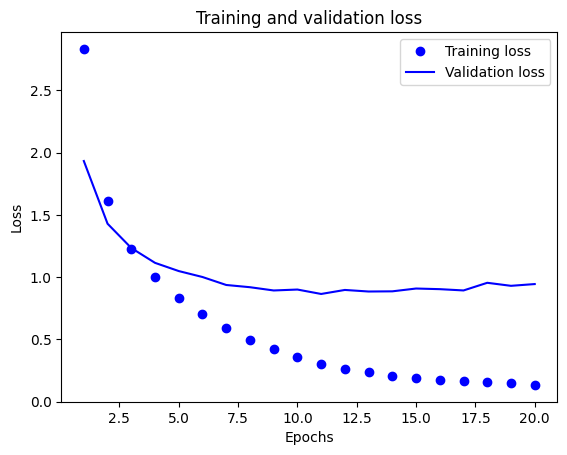

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

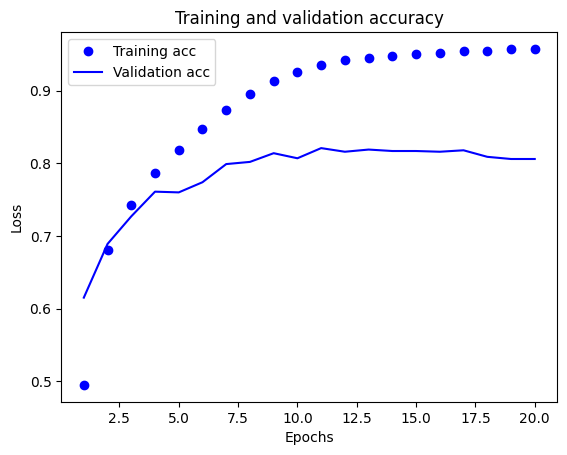

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.4220 - loss: 3.0823 - val_accuracy: 0.5910 - val_loss: 1.7982
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6361 - loss: 1.6407 - val_accuracy: 0.6730 - val_loss: 1.4383
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7287 - loss: 1.2404 - val_accuracy: 0.7300 - val_loss: 1.2331
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7754 - loss: 1.0095 - val_accuracy: 0.7480 - val_loss: 1.1211
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8161 - loss: 0.8521 - val_accuracy: 0.7740 - val_loss: 1.0303
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8459 - loss: 0.6982 - val_accuracy: 0.7940 - val_loss: 0.9822
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8686 - loss: 0.5914 - val_accuracy: 0.7940 - val_loss: 0.9367
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8934 - loss: 0.5068 - val_accuracy: 0.8120 - 

In [20]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[:3])

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
(2246, 46)
[[3.64413040e-06 7.04940525e-04 2.19195463e-05 9.14043009e-01
  7.10105300e-02 5.19116441e-07 1.01291953e-04 3.57894496e-05
  3.55271436e-03 7.23489968e-04 1.86959398e-04 9.88203916e-04
  8.84839974e-05 2.31434315e-04 1.32977235e-04 3.96237920e-06
  3.33429291e-03 1.74277113e-04 1.35680559e-04 1.02786114e-03
  1.02712179e-03 2.59847293e-04 1.64343055e-05 2.57724838e-04
  8.81432697e-06 4.61742165e-05 3.62335868e-06 1.25907345e-05
  2.08822225e-04 1.88974518e-05 5.56916384e-05 2.44258088e-04
  4.43730096e-05 3.25253131e-05 2.00885595e-04 3.55558695e-05
  2.37282817e-04 5.99570603e-06 8.60278124e-06 4.30633081e-04
  2.07069461e-05 2.16191926e-04 1.44131727e-05 5.92962169e-05
  9.59567751e-06 2.19909252e-05]
 [5.66630733e-05 8.85269418e-03 3.03823792e-04 8.94718960e-06
  1.07785990e-03 1.14337646e-03 6.26753463e-05 6.56351631e-07
  1.46437742e-05 1.65229535e-03 9.67239857e-01 5.08153207e-05
  4.72362080e-05 2.49880832e-05 5.32855745e-03 6.

In [21]:
print(np.argmax(y_pred[0]))
print(np.argmax(y_pred[1]))
print(np.argmax(y_pred[2]))

3
10
1


In [22]:
results = model.evaluate(X_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7932 - loss: 0.9102
[0.9405954480171204, 0.7849510312080383]


In [23]:
results = model.evaluate(partial_X_train, partial_y_train)
print(results)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9299 - loss: 0.3130
[0.2940034866333008, 0.9373590350151062]


In [25]:
results = model.evaluate(X_val, y_val)
print(results)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8313 - loss: 0.8244
[0.8628184199333191, 0.8240000009536743]


In [26]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.4231 - loss: 3.1908 - val_accuracy: 0.6490 - val_loss: 1.9858
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6852 - loss: 1.7722 - val_accuracy: 0.7110 - val_loss: 1.4410
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7409 - loss: 1.2901 - val_accuracy: 0.7520 - val_loss: 1.1958
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8030 - loss: 0.9967 - val_accuracy: 0.7700 - val_loss: 1.0701
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8356 - loss: 0.8073 - val_accuracy: 0.7970 - val_loss: 0.9776
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8634 - loss: 0.6883 - val_accuracy: 0.7990 - val_loss: 0.9247
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8878 - loss: 0.5775 - val_accuracy: 0.8100 - val_loss: 0.8750
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9018 - loss: 0.5058 - val_accuracy: 0.8150 - 

In [27]:
model = keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.3924 - loss: 3.3075 - val_accuracy: 0.6070 - val_loss: 2.3306
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6382 - loss: 2.1270 - val_accuracy: 0.6580 - val_loss: 1.7590
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6947 - loss: 1.6052 - val_accuracy: 0.7020 - val_loss: 1.4543
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7486 - loss: 1.2684 - val_accuracy: 0.7290 - val_loss: 1.2764
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7685 - loss: 1.1065 - val_accuracy: 0.7480 - val_loss: 1.1642
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7923 - loss: 0.9620 - val_accuracy: 0.7640 - val_loss: 1.0802
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8176 - loss: 0.8478 - val_accuracy: 0.7750 - val_loss: 1.0271
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8414 - loss: 0.7474 - val_accuracy: 0.7940 - 

In [34]:
results = model.evaluate(X_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.8596
[0.8858125805854797, 0.7960819005966187]


# PyTorch

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class TorchModel(nn.Module):
  def __init__(self):
    super(TorchModel, self).__init__()
    self.fc1 = nn.Linear(10000, 32)
    self.fc2 = nn.Linear(32, 46)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

model = TorchModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())


X_train = tokenizer.sequences_to_matrix(train_data)
X_test = tokenizer.sequences_to_matrix(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
n_val = 1000
X_val = X_train[:n_val]
partial_X_train = X_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

partial_X_train = torch.tensor(partial_X_train, dtype=torch.float32)
partial_y_train = torch.tensor(np.argmax(partial_y_train, axis=1), dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(np.argmax(y_val, axis=1), dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

num_epochs = 100
batch_size = 512

for epoch in range(num_epochs):
  for i in range(0, len(partial_X_train), batch_size):
    batch_X = partial_X_train[i:i+batch_size]
    batch_y = partial_y_train[i:i+batch_size]
    optimizer.zero_grad()
    outputs = model(batch_X)
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()
  if epoch % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


Epoch 1/100, Loss: 3.260669231414795
Epoch 11/100, Loss: 3.105374813079834
Epoch 21/100, Loss: 3.056007146835327
Epoch 31/100, Loss: 3.0265707969665527
Epoch 41/100, Loss: 3.0226950645446777
Epoch 51/100, Loss: 2.9870645999908447
Epoch 61/100, Loss: 2.986938238143921
Epoch 71/100, Loss: 2.9835267066955566
Epoch 81/100, Loss: 2.9771883487701416
Epoch 91/100, Loss: 2.9703989028930664


In [50]:
with torch.no_grad():
  outputs = model(X_test)
  _, predicted = torch.max(outputs, 1)
  accuracy = (predicted == y_test).sum().item() / len(y_test)
  print("accuracy:", accuracy)

accuracy: 0.7631344612644702
